# Example

In [6]:
# import libraries
import gym
import gym_trading

import numpy as np

np.random.seed(10)

In [7]:
# creating environment
env = gym.make('trading-v0',
               n_samples=1000,
               sampling_every=16,
               random_initial_date=False,
               stack_size=10,
               fee=0.25,
               reward_function='AAV',
               endurance_mode=False,
               normalize_observation=True)

print('Number of actions:', env.action_space.n)

Number of actions: 2


In [8]:
# resetting environment
observation = env.reset()  # the observation is the price of the bitcoin at this timestamp.
print(f'Observation: {observation} (type: {type(observation)})')
print(observation.shape)

Observation: [5247.3  5282.2  5400.   5487.55 5351.75 5352.9  5400.1  5369.5  5057.6
 4528.75] (type: <class 'numpy.ndarray'>)
(10,)


In [9]:
rewards = []
# simulating a trading session
done = False
counter = 0
action = 1
while not done:

    # random action [BUY, SELL]
    if counter % 3 == 0 and counter != 0:
        action = np.random.choice([0, 1], p=[0.95, 0.05])  # actions admitted are 0 and 1 only.
    observation, reward, done, _ = env.step(action)
    rewards.append(reward)
    if counter % 1000 == 0:
        print(f'Iteration: {counter} - '
              f'Reward (AAV): {reward} - '
              f'Done: {done} - Price: {observation} (type: {type(observation)})')

    counter += 1

print(f'Total profit: {round(env.get_profit(), 2)} %')

Iteration: 0 - Reward (AAV): 0 - Done: False - Price: [ 0.21048677  0.6428365   0.96416247  0.465749    0.4699694   0.6432039
  0.5308952  -0.61384225 -2.554832   -0.75863266] (type: <class 'numpy.ndarray'>)
Total profit: 131.13 %


/home/damiano/PycharmProjects/gym-trading/gym_trading/envs/TradingGame.py:229: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


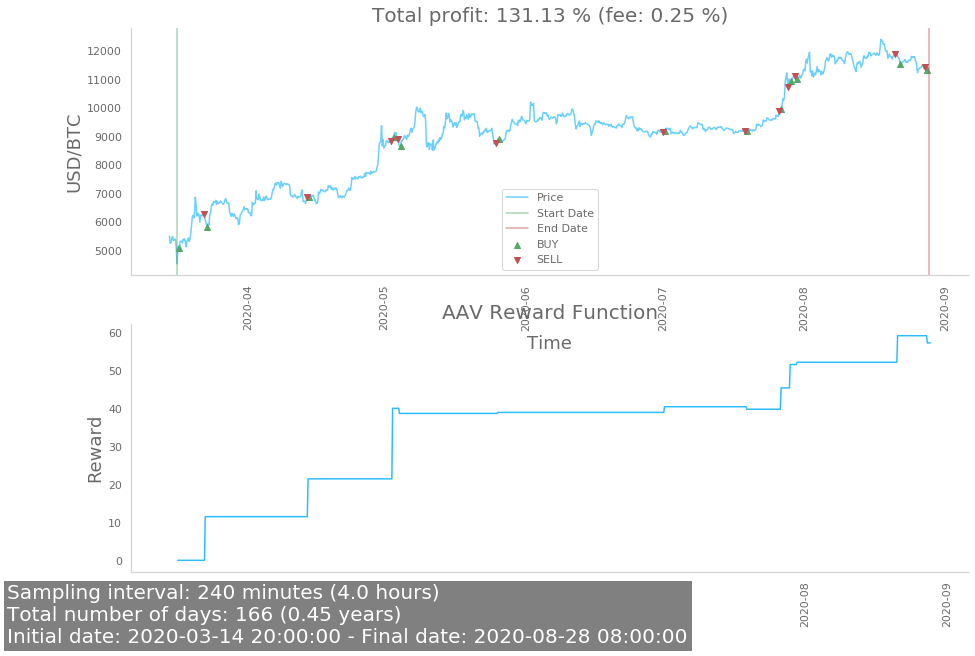

In [10]:
env.render()